# <img src="https://colorlib.com/wp/wp-content/uploads/sites/2/2014/02/Olympic-logo.png" width="240" height="360" />
# EDA on Summer Olympics

# Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Grouping](#section401)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Athlete vs Year](#section501)<br/>
    - 5.2 [Athlete vs Sport](#section502)<br/>
    - 5.3 [Gender vs Year group](#section503)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Which country won maximum number of times](#section601)<br/>
     - 6.2 [What is medal distribution of 2012?](#section602)<br/>
     - 6.3 [What are top 5 performing countries in 2012](#section603)<br/>
     - 6.4 [Which countries showed consistent performance over the years?](#section604)<br/>
- 7. [Conclusion](#section7)<br/>

# <a id=section1></a> 
## 1. Problem Statement

"This is a  dataset on the Summer Olympic Games, including all the Games from Athens 1896 to London 2012. The Olympics is multi-sport world championship and this data helps us in visualizing major patterns in Olympic history."



<a id=section101></a> 
### 1.1. Introduction
The modern Olympic Games are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. Here we will look into Summer Olympics.

<a id=section102></a> 
### 1.2. Data source and dataset

How was it collected? 

- __Name__: "Olympics data"
- __Sponsoring Organization__: Github
- __Description__: "We have over 117 years of data right from beginning of Olympics in Athens, 1896 to London, 2012."


Data: https://github.com/insaid2018/Term-1/blob/master/Data/Projects/summer%20olympics.csv <br/>


Year - Year of Olympic game<br/>
City - City where Olympics were held in that year<br/>
Sport - Name of the Sport played<br/>
Discipline - Sub category of Sport<br/>
Athlete - Name of the Athlete winning the Discipline<br/>
Country - County Athlete belongs to<br/>
Gender - Gender of the Athlete<br/>
Event  - Event played under specific Discipline<br/>
Medal - Gold, Silver or Bronze won by Athlete in that Event<br/>

<a id=section2></a> 
### 2. Load the packages and data 

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

ds = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")                       # Load in the dataset as mh

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [23]:
ds.dtypes                                                                       # Display the data type for each variable

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

<a id=section302></a> 

In [24]:
ds.head()                                                                      # Display the first five rows of the data set

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<a id=section303><a/>

In [25]:
ds.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=section304></a> 

In [26]:
ds.sample(10)                                                                  # Display a random 10 rows from the data set

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
30552,2012,London,Hockey,Hockey,"HABIF, Florencia",ARG,Women,Hockey,Silver
15377,1980,Moscow,Athletics,Athletics,"KONDRATIEVA, Liudmila",URS,Women,100M,Gold
26010,2004,Athens,Cycling,Cycling Road,"PAULINHO, Sergio",POR,Men,Individual Road Race,Silver
9829,1960,Rome,Aquatics,Swimming,"TROY, Michael Francis",USA,Men,200M Butterfly,Gold
6867,1936,Berlin,Gymnastics,Artistic G.,"TÖRÖS, Olga",HUN,Women,Team Competition,Bronze
8607,1952,Helsinki,Gymnastics,Artistic G.,"KORONDI, Margit",HUN,Women,Team Competition,Silver
2403,1912,Stockholm,Gymnastics,Artistic G.,"BRUSTAD, Georg",NOR,Men,"Team, Swedish System",Bronze
9928,1960,Rome,Athletics,Athletics,"HYMAN, Dorothy",GBR,Women,100M,Silver
13788,1972,Munich,Volleyball,Volleyball,"RYOM, Chun Ja",PRK,Women,Volleyball,Bronze
20664,1992,Barcelona,Handball,Handball,"MOON, Hyang-Ja",KOR,Women,Handball,Gold


In [ ]:
#!pip install pandas-profiling==1.4.3
!pip install -q datascience
!pip install -q pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
                                                 # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(ds)

In [ ]:
profile.to_file("pre_profiling.html")  

#### Count the number of distinct responses and list them.

In [29]:
print("'Year'")                                                                
print("Minimum value: ", ds["Year"].min())
print("Maximum value: ", ds["Year"].max())
print("How many values are NaN?: ", pd.isnull(ds['Year']).sum())

'Year'
Minimum value:  1896
Maximum value:  2012
How many values are NaN?:  0


In [30]:
print("Count of distinct responses for City:", len(set(ds['City'])))      
print("Distinct responses for City:", set(ds['City']))

Count of distinct responses for City: 22
Distinct responses for City: {'London', 'Antwerp', 'St Louis', 'Paris', 'Berlin', 'Montreal', 'Moscow', 'Helsinki', 'Beijing', 'Tokyo', 'Atlanta', 'Munich', 'Athens', 'Barcelona', 'Sydney', 'Rome', 'Los Angeles', 'Seoul', 'Stockholm', 'Mexico', 'Amsterdam', 'Melbourne / Stockholm'}


In [31]:
print("Count of distinct responses for Sport:", len(set(ds['Sport'])))     
print("Distinct responses for Sport:", set(ds['Sport']))                  

Count of distinct responses for Sport: 43
Distinct responses for Sport: {'Polo', 'Hockey', 'Volleyball', 'Rugby', 'Modern Pentathlon', 'Table Tennis', 'Weightlifting', 'Rackets', 'Wrestling', 'Golf', 'Badminton', 'Softball', 'Boxing', 'Athletics', 'Canoe', 'Taekwondo', 'Handball', 'Fencing', 'Skating', 'Equestrian', 'Tug of War', 'Shooting', 'Lacrosse', 'Baseball', 'Football', 'Sailing', 'Canoe / Kayak', 'Ice Hockey', 'Tennis', 'Cycling', 'Rowing', 'Basketball', 'Triathlon', 'Basque Pelota', 'Judo', 'Cricket', 'Water Motorsports', 'Archery', 'Roque', 'Aquatics', 'Croquet', 'Gymnastics', 'Jeu de paume'}


In [32]:
print("Count of distinct responses for Discipline:", len(set(ds['Discipline'])))      
print("Distinct responses for Discipline:", set(ds['Discipline']))

Count of distinct responses for Discipline: 67
Distinct responses for Discipline: {'Polo', 'Synchronized Swimming', 'Hockey', 'Water Motorspor', 'Wrestling Free.', 'Volleyball', 'Cycling Track', 'Eventing', 'Rugby', 'Canoe Slalom', 'Cycling Road', 'Synchronized S.', 'Modern Pentathlon', 'Table Tennis', 'Weightlifting', 'Rackets', 'Modern Pentath.', 'Jumping', 'Wrestling Gre-R', 'Vaulting', 'Rhythmic G.', 'Golf', 'Gymnastics Artistic', 'Badminton', 'Softball', 'Boxing', 'Athletics', 'Wrestling Freestyle', 'Figure skating', 'Canoe / Kayak F', 'Taekwondo', 'Handball', 'Trampoline', 'BMX', 'Gymnastics Rhythmic', 'Jeu de Paume', 'Fencing', 'Beach Volleyball', 'Diving', 'Tug of War', 'Shooting', 'Lacrosse', 'Baseball', 'Cycling BMX', 'Football', 'Sailing', 'Canoe / Kayak S', 'Canoe Sprint', 'Ice Hockey', 'Artistic G.', 'Beach volley.', 'Tennis', 'Swimming', 'Mountain Bike', 'Rowing', 'Basketball', 'Triathlon', 'Water polo', 'Basque Pelota', 'Cricket', 'Judo', 'Marathon swimming', 'Water Polo

In [33]:
print("Count of distinct responses for Athlete:", len(set(ds['Athlete'])))      
#print("Distinct responses for Discipline:", set(ds['Athlete']))

Count of distinct responses for Athlete: 22762


In [34]:
print("Count of distinct responses for Country:", len(set(ds['Country'])))      
print("Distinct responses for Country:", set(ds['Country']))

Count of distinct responses for Country: 148
Distinct responses for Country: {nan, 'INA', 'URU', 'TGA', 'HUN', 'DOM', 'GRE', 'USA', 'AHO', 'SUR', 'KGZ', 'SWE', 'GRN', 'KEN', 'SRB', 'YUG', 'RSA', 'TTO', 'ZZX', 'ARM', 'CAN', 'HKG', 'IRL', 'ALG', 'CZE', 'CIV', 'UAE', 'SEN', 'KOR', 'MDA', 'LIB', 'BWI', 'BOT', 'BDI', 'GUA', 'KUW', 'ZAM', 'BAH', 'FRG', 'AFG', 'DEN', 'NOR', 'VEN', 'COL', 'NIG', 'JPN', 'MAR', 'CUB', 'LUX', 'SCG', 'TCH', 'CRO', 'JAM', 'THA', 'ERI', 'SUI', 'ESP', 'CHN', 'GDR', 'FRA', 'EUA', 'EGY', 'TUR', 'ZIM', 'NZL', 'TOG', 'ISV', 'CRC', 'TRI', 'HAI', 'EST', 'BEL', 'POL', 'GHA', 'QAT', 'SUD', 'ETH', 'AZE', 'BUL', 'BLR', 'KSA', 'TAN', 'BAR', 'MKD', 'FIN', 'PAN', 'CHI', 'NED', 'ISR', 'PUR', 'ANZ', 'POR', 'SIN', 'EUN', 'SLO', 'RU1', 'GER', 'MAS', 'MRI', 'VIE', 'BRN', 'ITA', 'ARG', 'PAR', 'SYR', 'TPE', 'BOH', 'MNE', 'UGA', 'TUN', 'IND', 'ISL', 'RUS', 'MOZ', 'MEX', 'MGL', 'CMR', 'AUT', 'UZB', 'PRK', 'UKR', 'CYP', 'ROU', 'IRI', 'NAM', 'SRI', 'NGR', 'GUY', 'PAK', 'IOP', 'URS', 'PHI', 

In [35]:
print("Count of distinct responses for Gender:", len(set(ds['Gender'])))     
print("Distinct responses for Gender:", set(ds['Gender']))

Count of distinct responses for Gender: 2
Distinct responses for Gender: {'Men', 'Women'}


In [37]:
print("Count of distinct responses for Event:", len(set(ds['Event'])))      
#print("Distinct responses for Event:", set(ds['Event']))

Count of distinct responses for Event: 666


In [38]:
print("Count of distinct responses for Medal:", len(set(ds['Medal'])))      
print("Distinct responses for Medal:", set(ds['Medal']))

Count of distinct responses for Medal: 3
Distinct responses for Medal: {'Bronze', 'Silver', 'Gold'}


### Observations

As we can see there are is numerical data except Year column and none of the columns has any outlier. All column entries also look quiet clean and not absurd, also there are no missing values. So, we are good to go with this data.

<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

In [39]:
ds.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

### 4.1 Grouping 

Text(0.5, 1.0, 'Year vs Gender')

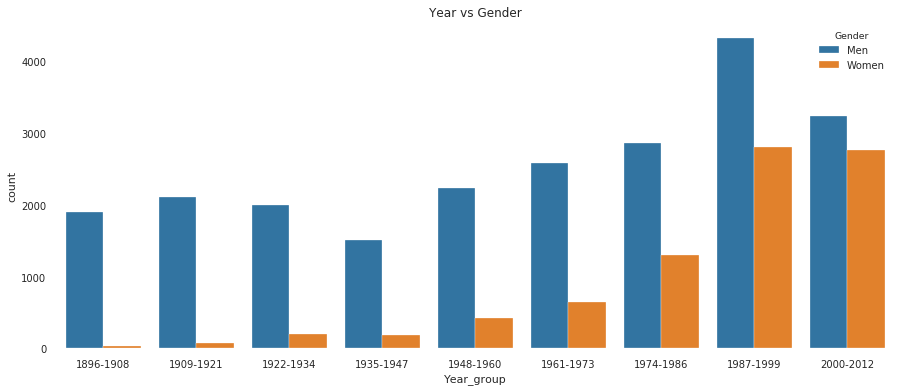

In [58]:
ds['Year_group'] = pd.cut(mh['Year'],
                         [1896,1909,1922,1935,1948,1961,1974,1987,2000,2013],
                         labels=['1896-1908','1909-1921','1922-1934','1935-1947','1948-1960','1961-1973','1974-1986','1987-1999','2000-2012'], include_lowest=True)
fig,ax =plt.subplots(figsize=(15,6))
sns.countplot(data = ds,x = 'Year_group', hue='Gender')
plt.title('Year vs Gender')

- This shows how participation of male and female has changed in every 13 years. We will discuss the trend in analysis part.

### 5. Identify patterns in the data

### 5.1 Trend in Athlete participation over time

Text(0, 0.5, 'Athlete')

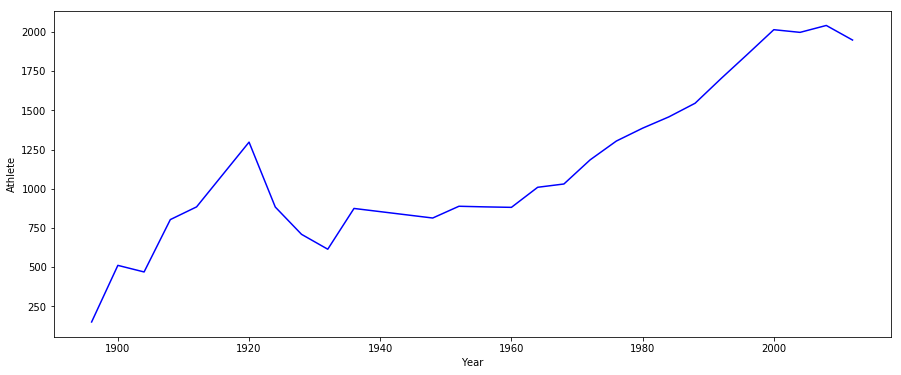

In [29]:
plt.figure(figsize = (15, 6))
ds.groupby('Year')['Athlete'].count().plot(kind='line', color='b')
plt.ylabel('Athlete')

### 5.2 List of top 10 most played Sport in 117 years

Text(0, 0.5, 'Athlete')

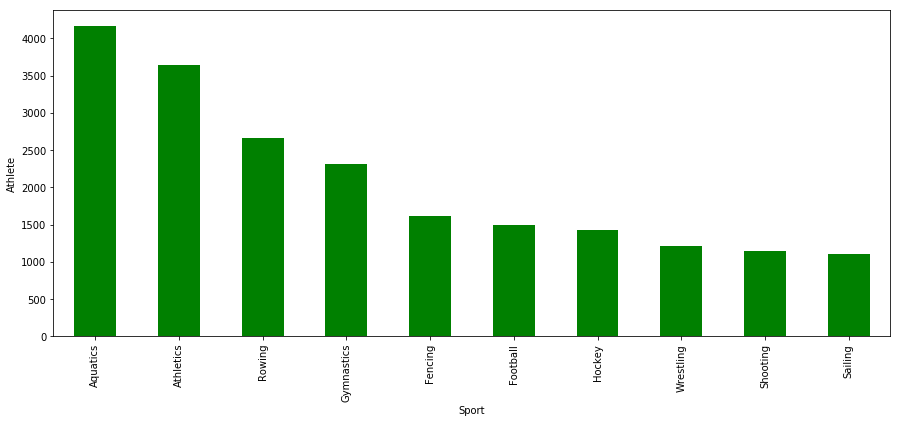

In [39]:
plt.figure(figsize = (15, 6))
ds.groupby('Sport')['Athlete'].count().sort_values(ascending=False)[0:10].plot(kind='bar', color='g')
plt.ylabel('Athlete')

 - Most of the athletes played under **Aquatics** sport. So, **Aquatics** sport has been most popular among athletes in Summer Olympics till now

### 5.3 Gender Analysis in Summer Olympics

### Contibution of Male and female all over the time

Since 1896 to 2012, 8419 female and 22746 male athletes competed in Olympics.


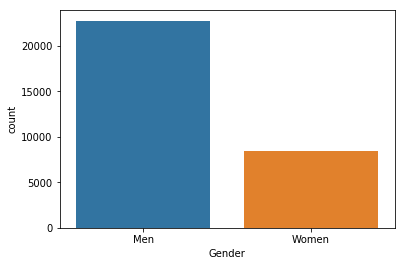

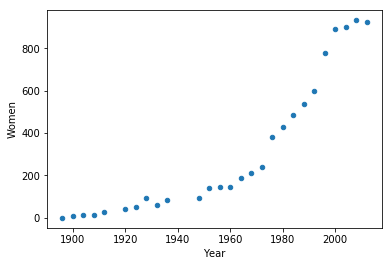

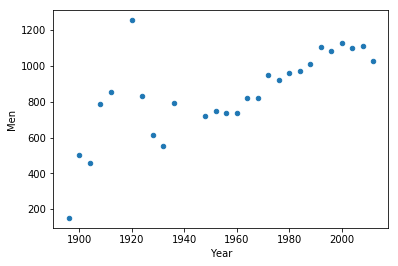

In [4]:
sns.countplot(ds.Gender, label = 'Count')
Men,Women = ds.Gender.value_counts()
print('Since {0} to {1}, {2} female and {3} male athletes competed in Olympics.'.format(ds.Year.min(),ds.Year.max(),Women,Men))

Year_Gender = pd.DataFrame(ds.groupby('Year')['Gender'].value_counts().unstack(fill_value=0))
Year_Gender = Year_Gender.reset_index()

Year_Gender.plot(kind = "scatter", x = 'Year', y = 'Women')
Year_Gender.plot(kind = "scatter", x = 'Year', y = 'Men')

<a id=section502><a/>

<a id=section6></a>
### 6. Analysis through questions

### 6.1 Which Country won maximum number of times?

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Country, dtype: int64


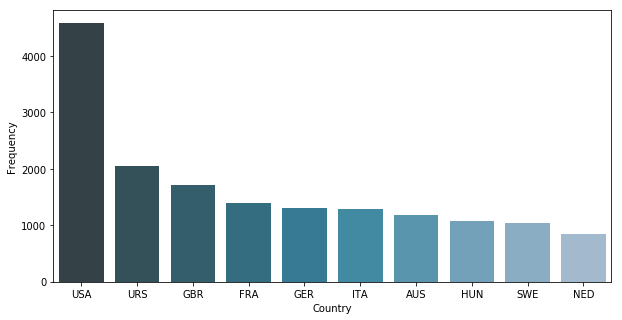

In [3]:
plt.figure(figsize=(10,5))
sns.countplot('Country',data = ds, order = ds['Country'].value_counts()[:10].index,palette="PuBuGn_d")
print(ds['Country'].value_counts()[:10])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

### Observation: 
USA has won around 5000 Sports in 117 years which is more than twice second country, URS has won.

### 6.2 What is Medal distribution of 2012?

Bronze    680
Gold      636
Silver    633
Name: Medal, dtype: int64


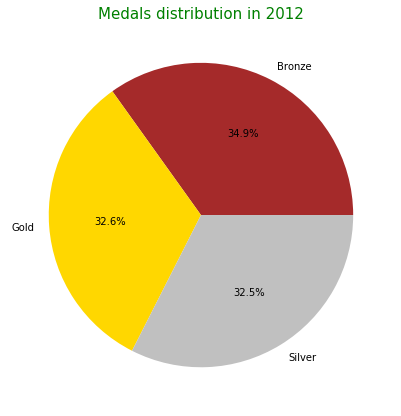

In [5]:
data2012 = ds[ds['Year'] == 2012]
data2012.Medal.value_counts()
print(data2012.Medal.value_counts())
labels = data2012.Medal.value_counts().index
colors = ['brown', 'gold', 'silver']
explode = [0, 0, 0]
sizes = data2012.Medal.value_counts().values

plt.figure(figsize = (7, 7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors , autopct='%1.1f%%')
plt.title('Medals distribution in 2012', color = 'green', fontsize = 15)
plt.show() 

### 6.3 What are top 5 performing countries in 2012? 

USA    250
RUS    130
CHN    128
GBR    126
AUS    114
Name: Country, dtype: int64


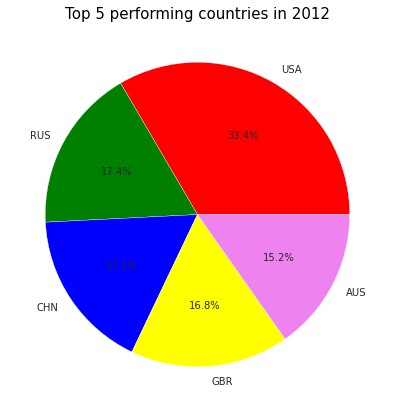

In [50]:
data2012 = ds[ds['Year'] == 2012]
print(data2012.Country.value_counts(ascending=False)[:5])
labels = data2012.Country.value_counts(ascending=False)[:5].index
colors = ['red', 'green', 'blue', 'yellow', 'violet']
explode = [0, 0, 0, 0, 0]
sizes = data2012.Country.value_counts(ascending=False)[:5].values

plt.figure(figsize = (7, 7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors , autopct='%1.1f%%')
plt.title('Top 5 performing countries in 2012', color = 'black', fontsize = 15)
plt.show() 

### 6.4 Which countries showed consistent performance over the years?

In [12]:
ds = ds.groupby(["Country", "Year"])["Medal"].count().unstack()
ds.head()

Year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
AHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,3.0,5.0,NaN,2.0,1.0
ANZ,NaN,NaN,NaN,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,11.0,32.0,4.0,11.0,12.0,6.0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,13.0,2.0,20.0,20.0,47.0,51.0,20.0


In [13]:
countries = [
    "USA", # United States of America
    "CHN", # China
    "RU1", "URS", "EUN", "RUS", # Russian Empire, USSR, Unified Team (post-Soviet collapse), Russia
    "GDR", "FRG", "EUA", "GER", # East Germany, West Germany, Unified Team of Germany, Germany
    "GBR", "AUS", "ANZ", # Australia, Australasia (includes New Zealand)
    "FRA", # France
    "ITA" # Italy
]


dsloc = ds.loc[countries]
dsloc.loc["Rest of world"] = ds.loc[ds.index.difference(countries)].sum()
dsloc = dsloc[::-1]

In [26]:
country_colors = {
    "USA":"steelblue",
    "CHN":"sandybrown",
    "RU1":"lightcoral", "URS":"indianred", "EUN":"indianred", "RUS":"lightcoral",
    "GDR":"yellowgreen", "FRG":"y",  "EUA":"y", "GER":"y", 
    "GBR":"silver",
    "AUS":"darkorchid", "ANZ":"darkorchid",
    "FRA":"silver",
    "ITA":"silver",
    "Rest of world": "gainsboro"}

In [24]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2)

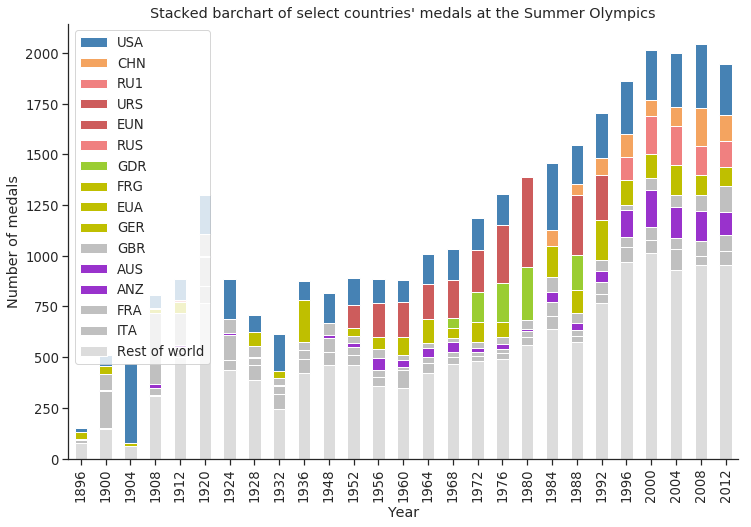

In [27]:
colors = [country_colors[c] for c in dsloc.index]

plt.figure(figsize=(12,8))
dsloc.T.plot.bar(stacked=True, color=colors, ax=plt.gca())

# Reverse the order of labels, so they match the data
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

# Set labels and remove superfluous plot elements
plt.ylabel("Number of medals")
plt.title("Stacked barchart of select countries' medals at the Summer Olympics")
sns.despine()

### Observations:
- USA has been most consistent except in 1980 when USA boycotted Olympics to protest the late 1979 Soviet invasion of Afghanistan.

<a id=section601><a/>

# Conclusion

- Overall there is a rise in participation over the years, but a small dip could be seen between 1900-1920. Also a fall could be seen between 1920-1940. The reason behind less participation is WW1 and WW2.(From Section 5.1)
- From 1896-2012, most of the athletes participated and won Aquatics Sport followed by Athletics.(From Section 5.2)
- Since 1896 to 2012, 8419 female and 22746 male athletes competed in Olympics which comes out to be a ratio of 0.37. Male participation has been way higher than female participation overall.(From Section 5.3)
- As we compare participation of Women with Men, Women participation has been less scattered and an exponential growth could be seen whereas Men participation shows highs and lows all over the years.(From Section 5.3)
- WW1 and WW2 effect can be seen clearly in Men participation trend but as Women participation was already low it is not evidently visible. But an interesting growth is observed in Women participation around year 1980 which was the onset era of “Women Empowerment”. Around year 2000, both show saturation in participation.(From Section 5.3)
- Increament in ratio of participation of women : men  could be seen in every 13 years and by the end of 2012 the gap has been reduced evidently.(From Section 4.1)
- USA stands at first position winning (4585/31165) ~ 14.8% of total played games, followed by URS(Soviet union) and GBR(Great Britain and Nothern Ireland).(From Section 6.1)
- In 2012 Olympics, 34.9% Bronze, 32.6% Gold and 32.5% Silver medals were distributed.(From Section 6.2)
- In 2012 Olympics also US stands first winning 250/1949 ~ 12.8% of medals distributed this year.(From Section 6.3)
- USA shows most consistent performance over the years except the year 1980 when USA boycotted Olympics to protest the late 1979 Soviet invasion of Afghanistan.(From Section 6.4)